### <font color='DarkRed'> Best Book of the Decade - Book Recommandation </font>
<p>Books are invaluable as they expand knowledge and stimulate imagination. They offer insights into diverse cultures and histories, inspire critical thinking, and, in my spare time, provide relaxation and an escape.
<p>I have always loved books, but I often find it hard to pick one to read. And the purpose of this analysis is to develop a recommendation to help readers find books that align with their interests and reading habits. By analyzing patterns in preferences ratings and scores, I aim to create a system that suggests books readers are likely to enjoy, enhancing their reading experience and encouraging exploration across diverse topics and genres.</p>

### <font color='DarkRed'> Import libaries and load the data </font>
First we will import pandas for data handling, numpy for numerical operationsload, and both the data to take a quick look at their structures.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
books_df = pd.read_csv("books-copy.csv")
books_df.head(10)

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,9014040,3937075
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3510284,3160284
2,3,Pride and Prejudice,Jane Austen,4.29,4400084,2784413
3,4,To Kill a Mockingbird,Harper Lee,4.26,6364109,2476505
4,5,The Book Thief,Markus Zusak,4.39,2662279,1856845
5,6,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.66,6805496,1702516
6,7,Animal Farm,George Orwell,3.99,4062818,1592078
7,8,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.61,137006,1540872
8,9,The Chronicles of Narnia (The Chronicles of Na...,C.S. Lewis,4.28,670721,1466464
9,10,The Fault in Our Stars,John Green,4.13,5327761,1355030


In [6]:
books_df.isnull().sum()

Index              0
Book Name          0
Author             0
Rating             0
Number of Votes    0
Score              0
dtype: int64

In [8]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9845 entries, 0 to 9844
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            9845 non-null   int64  
 1   Book Name        9845 non-null   object 
 2   Author           9845 non-null   object 
 3   Rating           9845 non-null   float64
 4   Number of Votes  9845 non-null   int64  
 5   Score            9845 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 461.6+ KB


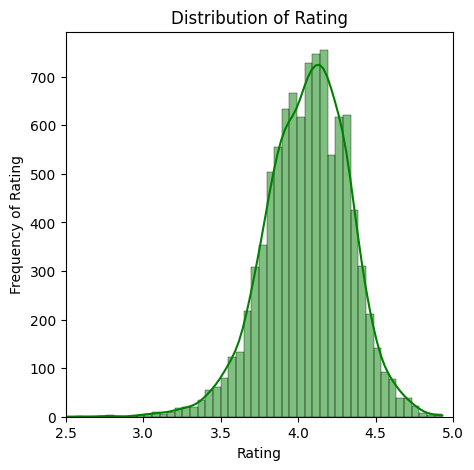

In [24]:
plt.figure(figsize=[5,5])
ax = sns.histplot(books_df["Rating"],bins=100,kde=True,color='green')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency of Rating')
plt.xlim(2.5, 5)
plt.show()

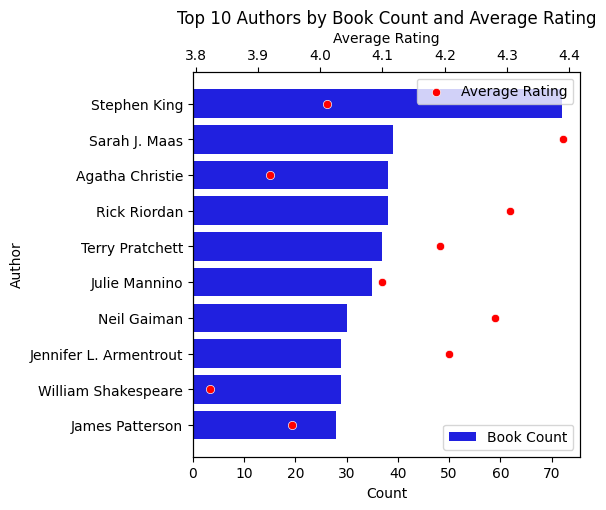

In [ ]:
author_stats = books_df.groupby('Author').agg({'Book Name': 'count', 'Rating': 'mean'}).reset_index()
author_stats.columns = ['Author', 'Book Count', 'Average Rating']
top_authors = author_stats.sort_values(by='Book Count', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(5, 5))
sns.barplot(y='Author', x='Book Count', data=top_authors, color='b', label='Book Count')

ax2 = ax1.twiny()
sns.scatterplot(y='Author', x='Average Rating', data=top_authors, color='r', marker='o', label='Average Rating', ax=ax2)

plt.title('Top 10 Authors by Book Count and Average Rating')
ax1.set_xlabel('Count') 
ax2.set_xlabel('Average Rating')
ax1.set_ylabel('Author')  

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()